<a href="https://colab.research.google.com/github/AlSamirShuvo/Diavetes_Prediction_using_ML-299-/blob/main/Diabetes_Prediction_System_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, roc_curve, roc_auc_score

Uploading CSV file


In [ ]:
url = 'https://raw.githubusercontent.com/AlSamirShuvo/Diavetes_Prediction_using_ML-299-/refs/heads/main/diabetes_prediction_dataset.csv'
Diabetes_dataset = pd.read_csv(url)

In [ ]:
Diabetes_dataset.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
# Summary statistics for numerical columns
print(" Summary Statistics:")
print(Diabetes_dataset.describe())

 Summary Statistics:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         

In [ ]:
# Distribution of the target variable (diabetes: 0 = No, 1 = Yes)
print(" Diabetes Class Distribution (in %):")
print(Diabetes_dataset['diabetes'].value_counts(normalize=True) * 100)

 Diabetes Class Distribution (in %):
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64


In [ ]:
# Value counts for categorical variables
print(" Gender Distribution:")
print(Diabetes_dataset['gender'].value_counts())

 Gender Distribution:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


In [ ]:
print(" Smoking History Distribution:")
print(Diabetes_dataset['smoking_history'].value_counts())

 Smoking History Distribution:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


Visualization

Checking missing values



In [ ]:
print(Diabetes_dataset.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Separating data and lebel


In [ ]:
X = Diabetes_dataset.drop('diabetes', axis=1)  # Features (independent variables)
y = Diabetes_dataset['diabetes']              # Label (dependent variable)


In [ ]:
X.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
5,Female,20.0,0,0,never,27.32,6.6,85
6,Female,44.0,0,0,never,19.31,6.5,200
7,Female,79.0,0,0,No Info,23.86,5.7,85
8,Male,42.0,0,0,never,33.64,4.8,145
9,Female,32.0,0,0,never,27.32,5.0,100


In [ ]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


Encoding String (Categorical) Columns in X

In [ ]:
le = LabelEncoder()

# Detect categorical columns (like gender, smoking_history, etc.)
cat_cols = X.select_dtypes(include='object').columns
print("Categorical columns:", cat_cols)

# Apply Label Encoding to each categorical column
for col in cat_cols:
    X[col] = le.fit_transform(X[col])


Categorical columns: Index(['gender', 'smoking_history'], dtype='object')


In [ ]:
X.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
5,0,20.0,0,0,4,27.32,6.6,85
6,0,44.0,0,0,4,19.31,6.5,200
7,0,79.0,0,0,0,23.86,5.7,85
8,1,42.0,0,0,4,33.64,4.8,145
9,0,32.0,0,0,4,27.32,5.0,100


Gender

Male-> 1

Female-> 0



Smoking History

No info-> 0

Current-> 1

ever-> 2

Former-> 3

Never-> 4

Not current-> 5

Split the data into training and testing sets (80% train, 20% test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Standardize the features

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Initialize KNN Model

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)

Train KNN Model

In [ ]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Prediction for a unseen value

In [ ]:
y_pred = model.predict(X_test_scaled)


Evaluating the model


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy = log_loss(y_test, y_pred)
print("log loss:", accuracy)

Accuracy: 0.96125
log loss: 1.39669156882829


In [ ]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.89      0.62      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000



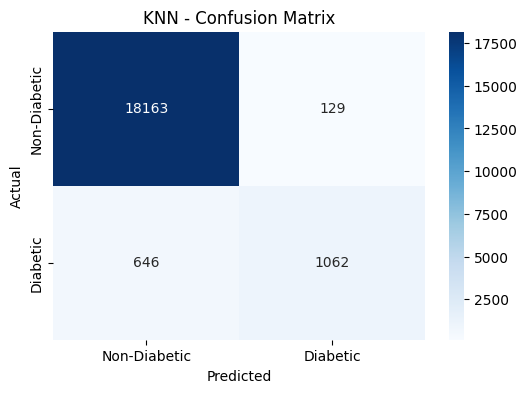

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

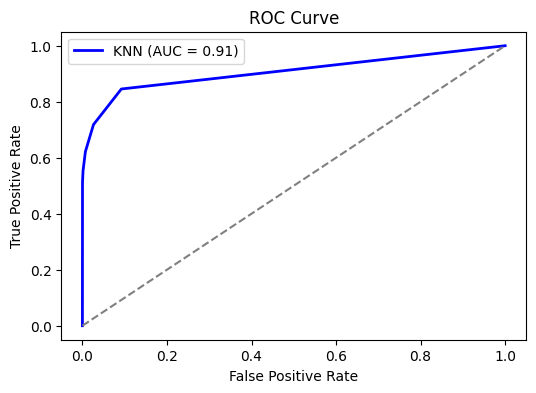

In [ ]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()